## Analysis of Dataset superstore

## 1. Problem Definition & Understanding

With growing market competition and increasing customer demands, the Superstore Giant aims to make data-driven decisions to improve business performance.

The objective of this project is to analyze the Superstore dataset to identify:

- Which **products** generate the highest and lowest sales and profits
- Which **regions** perform best and which should be avoided
- Which **categories and sub-categories** are most profitable
- Which **customer segments** contribute the most to revenue and profit

Additionally, this analysis aims to answer key business questions such as:
- Where should the company focus its marketing and inventory efforts?
- Which products or regions are causing losses?
- How can profitability be improved?

###  Extended Objective
As a further step, a **Regression Model** will be developed to predict:
- **Sales**
- or **Profit**

based on features such as:
- Category
- Sub-Category
- Region
- Segment
- Discount
- Quantity

This predictive model will help the Superstore forecast future performance and support strategic decision-making.


## 1-1 Asking questions

    What are the top selling products in the superstore?
    What is the sales trend over time (monthly, yearly)?
    Which category of products generates the highest revenue and profit?
    Which region generates the most sales?
    What is the impact of discounts and promotions on sales?
    What is the average profit margin for each product category?
    Which sub-category of products has the highest demand?



In [72]:
# --- Import Libraries ---

import pandas as pd
import matplotlib.pyplot as plt



In [73]:
# --- Load Dataset ---
df = pd.read_csv("Sample - Superstore.csv", encoding="cp1252")


In [74]:
# --- Basic Info ---

pd.options.display.max_rows = None
pd.options.display.max_columns= None
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [75]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,5/4/2017,5/9/2017,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,California,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [77]:
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

##  Some Statistical Information

To gain a better understanding of the dataset, basic statistical measures are analyzed. These statistics provide valuable insights into the distribution and quality of the data.

###  Understanding the Distribution of the Data
Measures such as the **mean**, **minimum**, **maximum**, and **standard deviation** offer a quick overview of how the data is distributed across different features. They help identify the central tendency and the spread of the data.

###  Outlier Detection
The **minimum**, **25% (Q1)**, **75% (Q3)**, and **maximum** values assist in detecting potential outliers. Extremely high or low values compared to the interquartile range may indicate anomalies that require further investigation.

###  Data Normalization
The **mean** and **standard deviation** are commonly used to normalize the data, ensuring that features follow a standard scale with a mean of zero and unit variance. This is especially useful for machine learning algorithms sensitive to feature magnitude.

###  Feature Scaling
Statistics such as **minimum** and **maximum** values are used in feature scaling techniques like **Min-Max Scaling**, which transforms features into a fixed range (usually 0 to 1). This improves model performance and convergence speed.


In [78]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


###  Negative Profit Analysis

The presence of negative profit values does not necessarily indicate an issue with the dataset.  
Negative profit can occur due to several business-related factors such as:

- High discount rates
- High shipping or operational costs
- Low-margin products
- Returns or promotional sales

Therefore, negative profit values are meaningful and should be analyzed further rather than removed

In [79]:
# Check duplication 
df.duplicated().sum()

0

## No duplicate records were detected, indicating good data quality.


In [80]:
# Selecting categorical features for analysis

df_categoric =df [['Ship Date' ,'Order Date', 'Customer ID' , 'Customer Name','Segment','Country',
                   'City','State','Region','Category','Sub-Category','Product Name']]
df_categoric.head()

,Ship Date,Order Date,Customer ID,Customer Name,Segment,Country,City,State,Region,Category,Sub-Category,Product Name
0,11/11/2016,11/8/2016,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase
1,11/11/2016,11/8/2016,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,..."
2,6/16/2016,6/12/2016,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...
3,10/18/2015,10/11/2015,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table
4,10/18/2015,10/11/2015,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System


In [81]:
for feature in df_categoric.columns:
    print(feature  , ':', df[feature].nunique())

Ship Date : 1334
Order Date : 1237
Customer ID : 793
Customer Name : 793
Segment : 3
Country : 1
City : 531
State : 49
Region : 4
Category : 3
Sub-Category : 17
Product Name : 1850


This analysis shows the number of unique values for each categorical feature. 
Features such as Category, Region, and Segment have low cardinality, making them suitable for grouped analysis and visualization.
On the other hand, features like Product Name and Customer Name have high cardinality and require special handling in further analysis.


In [82]:
product_group_selling = df.groupby('Product Name')['Sales'].sum()
product_group_selling.head()

Product Name
"While you Were Out" Message Book, One Form per Page     25.228
#10 Gummed Flap White Envelopes, 100/Box                 41.300
#10 Self-Seal White Envelopes                           108.682
#10 White Business Envelopes,4 1/8 x 9 1/2              488.904
#10- 4 1/8" x 9 1/2" Recycled Envelopes                 286.672
Name: Sales, dtype: float64

In [83]:
# Top 5 selling products based on total sales

top_five_selling_product = product_group_selling .sort_values(ascending=False).head(5)
print(top_five_selling_product)


Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
Name: Sales, dtype: float64


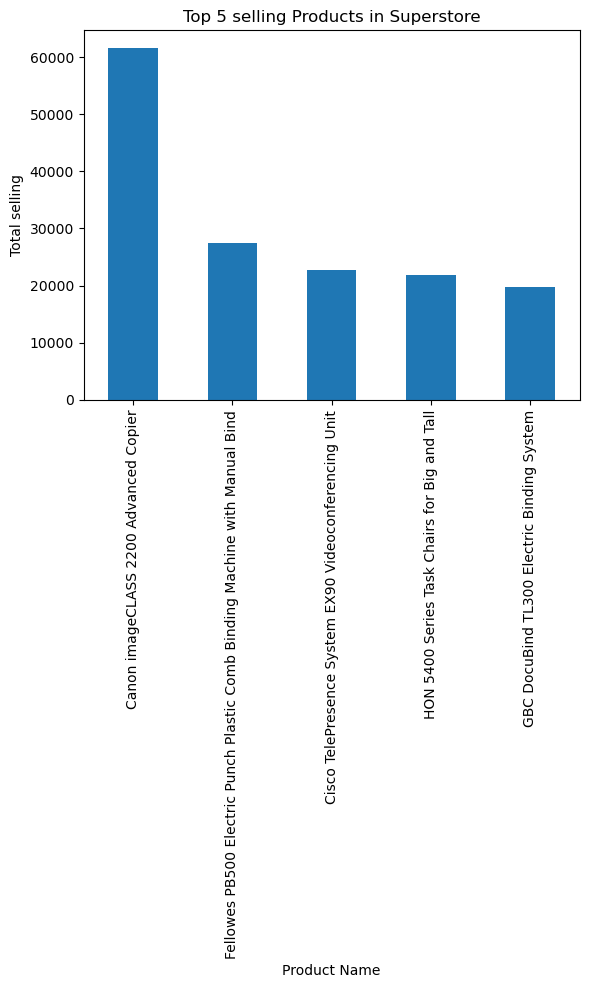

In [84]:
top_five_selling_product.plot(kind='bar')
# Add a title to the plot
plt.title("Top 5 selling Products in Superstore")

# Add labels to the x and y axes
plt.xlabel("Product Name")
plt.ylabel("Total selling")
plt.show()


In [85]:
product_group_profit = df.groupby('Product Name')['Profit'].sum()
top_five_profit_product = product_group_profit.sort_values(ascending=False)[0:5]
top_five_profit_product

Product Name
Canon imageCLASS 2200 Advanced Copier                                          25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind     7753.0390
Hewlett Packard LaserJet 3310 Copier                                            6983.8836
Canon PC1060 Personal Laser Copier                                              4570.9347
HP Designjet T520 Inkjet Large Format Printer - 24" Color                       4094.9766
Name: Profit, dtype: float64

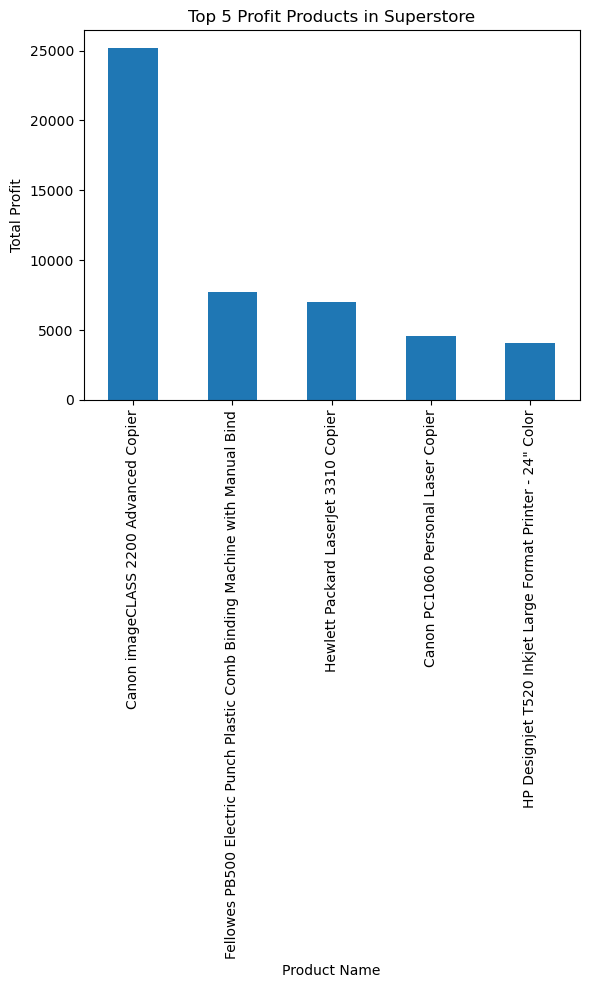

In [86]:
top_five_profit_product .plot(kind='bar')
# Add a title to the plot
plt.title("Top 5 Profit Products in Superstore")
# Add labels to the x and y axes
plt.xlabel("Product Name")
plt.ylabel("Total Profit")
plt.show()

While there is some overlap between the top selling and top profitable products, only two products are common between both lists. This indicates that high sales do not always translate into high profit.



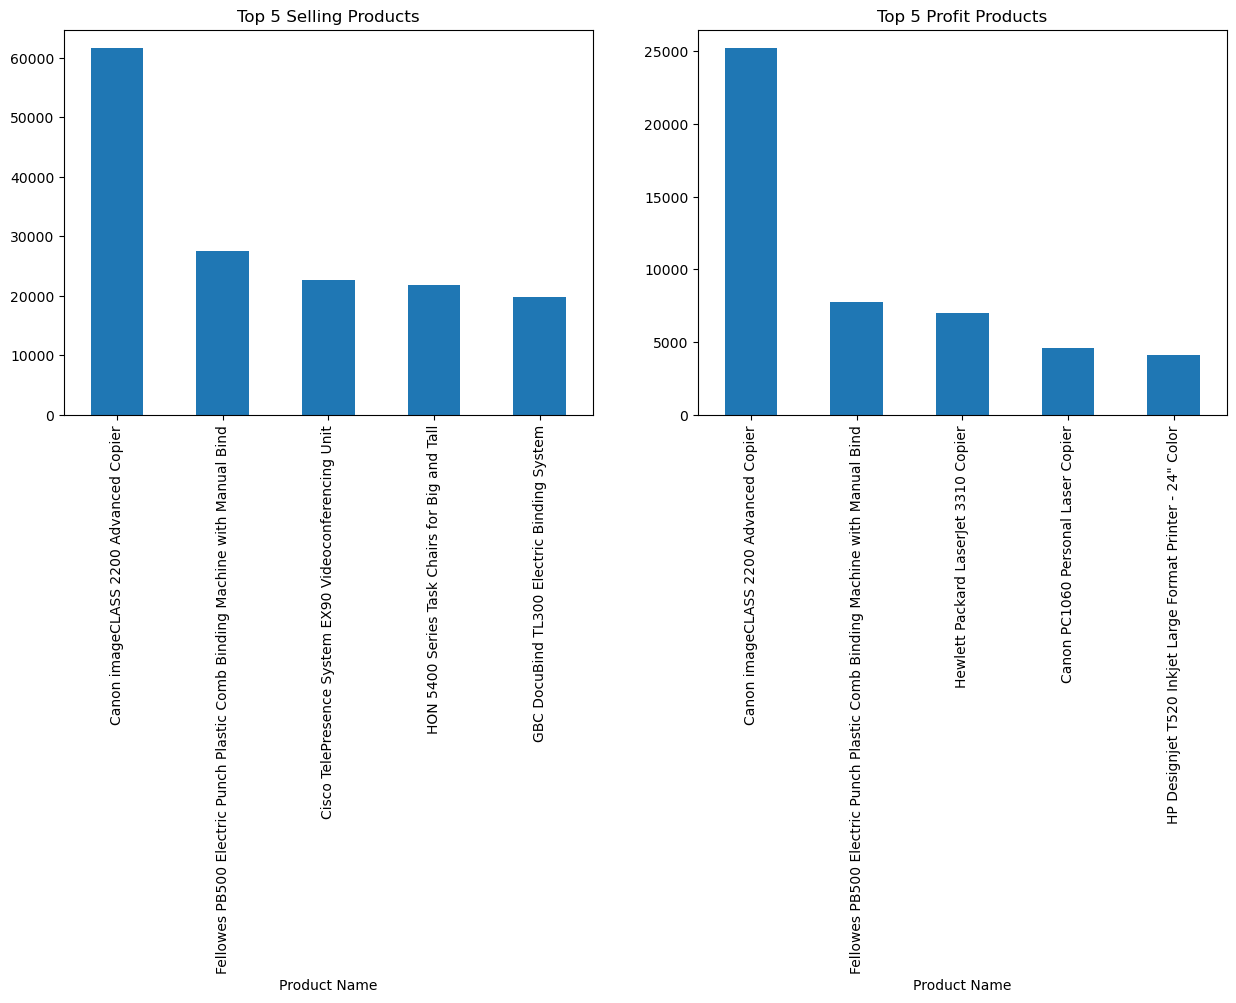

In [87]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
# Plot the top 5 selling products in the first column
top_five_selling_product.plot(kind="bar", y="Sales", ax=ax1)
# Set the title for the first plot
ax1.set_title("Top 5 Selling Products")
# Plot the top 5 profit products in the second column
top_five_profit_product.plot(kind="bar", y="Profit", ax=ax2)
# Set the title for the second plot
ax2.set_title("Top 5 Profit Products")
# Show the plot
plt.show()


##  Key Insights: Top Products

### Top 5 Selling Products
1. Canon imageCLASS 2200 Advanced Copier  
2. Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind  
3. Cisco TelePresence System EX90 Videoconferencing Unit  
4. HON 5400 Series Task Chairs for Big and Tall  
5. GBC DocuBind TL300 Electric Binding System  

### Top 5 Profit Products
1. Canon imageCLASS 2200 Advanced Copier  
2. Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind  
3. Hewlett Packard LaserJet 3310 Copier  
4. Canon PC1060 Personal Laser Copier  
5. HP Designjet T520 Inkjet Large Format Printer - 24" Color  

###  Observations
- The **highest selling products** and the **most profitable products** share the following items:
    - Canon imageCLASS 2200 Advanced Copier  
    - Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind  

- This indicates that these two products are not only in high demand but also generate the highest profit, making them **key products for the business**.

- Other products in the top 5 lists differ, highlighting that **high sales do not always translate to high profit**. Therefore, both **sales and profit metrics** should be considered in inventory and marketing decisions.


In [88]:
df.Region.value_counts()

Region
West       3203
East       2848
Central    2323
South      1620
Name: count, dtype: int64

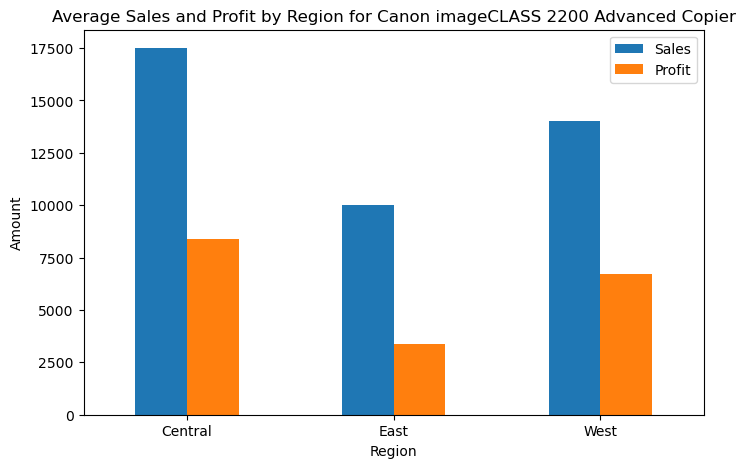

In [89]:
# Filter the data to include only the Canon imageCLASS 2200 Advanced Copier
product = df[df["Product Name"] == "Canon imageCLASS 2200 Advanced Copier"]

# Group the data by Region and calculate average Sales and Profit
region_group = product.groupby("Region")[["Sales", "Profit"]].mean()

# Plot the average Sales and Profit by Region
region_group.plot(kind="bar", figsize=(8,5))
plt.title("Average Sales and Profit by Region for Canon imageCLASS 2200 Advanced Copier")
plt.ylabel("Amount")
plt.xlabel("Region")
plt.xticks(rotation=0)
plt.show()

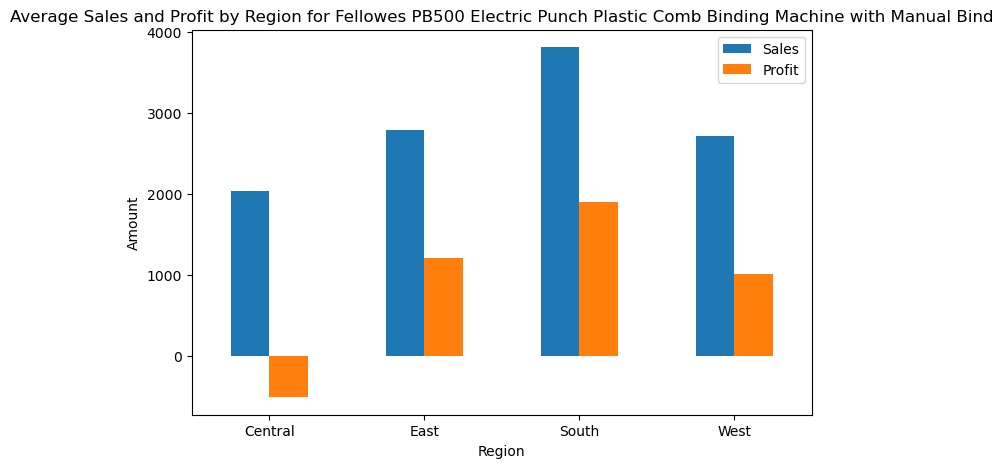

In [90]:
# Filter the data to include only the Canon imageCLASS 2200 Advanced Copier
product_2 = df[df["Product Name"] == "Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind"]

# Group the data by Region and calculate average Sales and Profit
region_group_2 = product_2.groupby("Region")[["Sales", "Profit"]].mean()

# Plot the average Sales and Profit by Region
region_group_2.plot(kind="bar", figsize=(8,5))
plt.title("Average Sales and Profit by Region for Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind")
plt.ylabel("Amount")
plt.xlabel("Region")
plt.xticks(rotation=0)
plt.show()

In [91]:
product = df[(df["Product Name"] == "Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind") & (df["Region"] == "Central")]
product

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2846,2847,CA-2017-152093,9/10/2017,9/15/2017,Standard Class,SN-20560,Skye Norling,Home Office,United States,Chicago,Illinois,60653,Central,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,762.594,3,0.8,-1143.891
5310,5311,CA-2017-131254,11/19/2017,11/21/2017,First Class,NC-18415,Nathan Cano,Consumer,United States,Houston,Texas,77095,Central,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,1525.188,6,0.8,-2287.782
7683,7684,CA-2015-120782,4/28/2015,5/1/2015,First Class,SD-20485,Shirley Daniels,Home Office,United States,Midland,Michigan,48640,Central,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,3812.970,3,0.0,1906.485


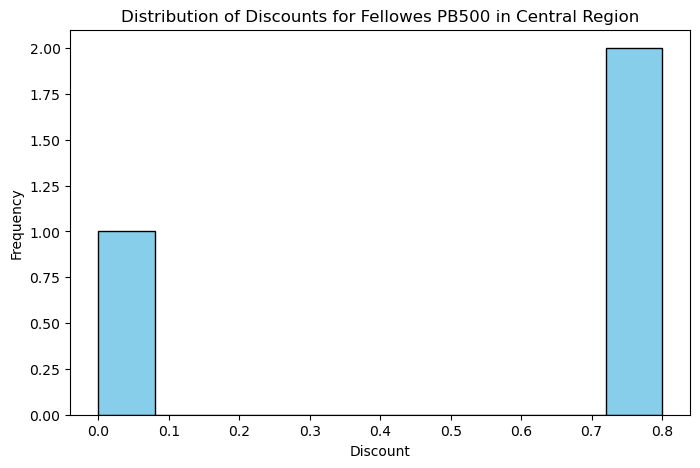

In [92]:
# Filter the product in Central region
product = df[(df["Product Name"] == "Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind") &
             (df["Region"] == "Central")]

# Plot a histogram of the discounts offered for the product in Central region
product["Discount"].plot(kind="hist", bins=10, figsize=(8,5), color='skyblue', edgecolor='black')
plt.title("Distribution of Discounts for Fellowes PB500 in Central Region")
plt.xlabel("Discount")
plt.ylabel("Frequency")
plt.show()



The company loses when it sells its Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind products in the Central! as it make 80% discount on 2 products from 3 products


## What is the sales and profit trend over time (monthly, yearly)?

In [93]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

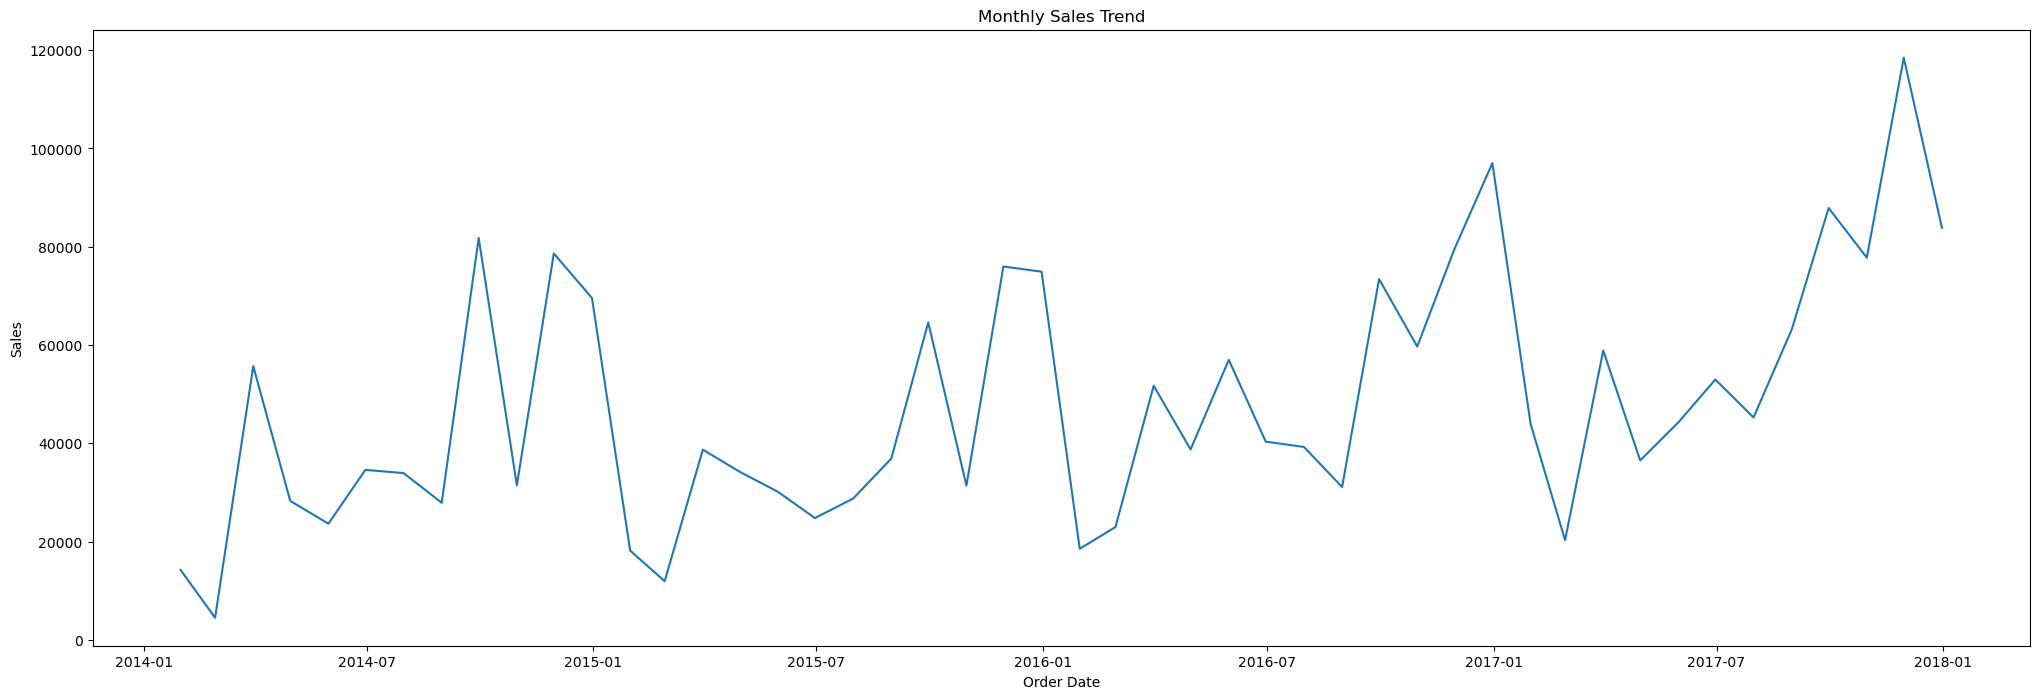

In [94]:
monthly_sales = df.groupby(['Order Date'], as_index=False).sum()

# Set the Order Date column as the index of the dataframe
monthly_sales = monthly_sales.set_index('Order Date')

# Resample the data into monthly intervals
monthly_sales = monthly_sales.resample('ME').sum() # M for month

# Plot
plt.figure(figsize=(25,8))
plt.plot(monthly_sales['Sales'])
plt.xlabel("Order Date")
plt.ylabel("Sales")
plt.title("Monthly Sales Trend")
plt.show()



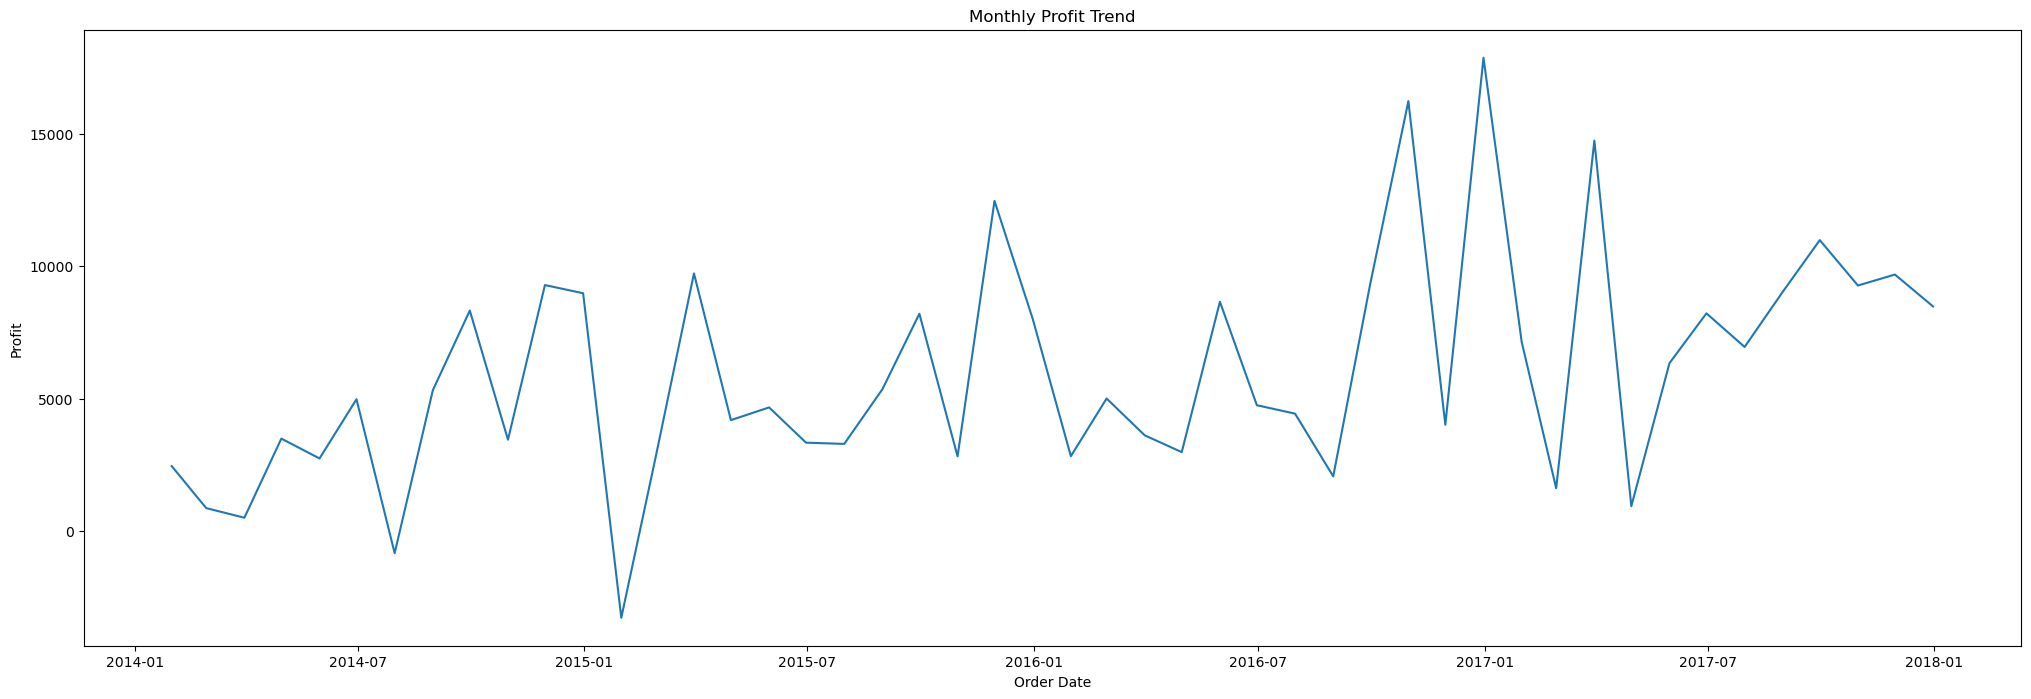

In [95]:
monthly_profit = df.groupby(['Order Date'], as_index=False).sum()

# Set the Order Date column as the index of the dataframe
monthly_profit = monthly_profit.set_index('Order Date')

# Resample the data into monthly intervals
monthly_profit = monthly_profit.resample('ME').sum() # M for month

# Plot
plt.figure(figsize=(25,8))
plt.plot(monthly_sales['Profit'])
plt.xlabel("Order Date")
plt.ylabel("Profit")
plt.title("Monthly Profit Trend")
plt.show()

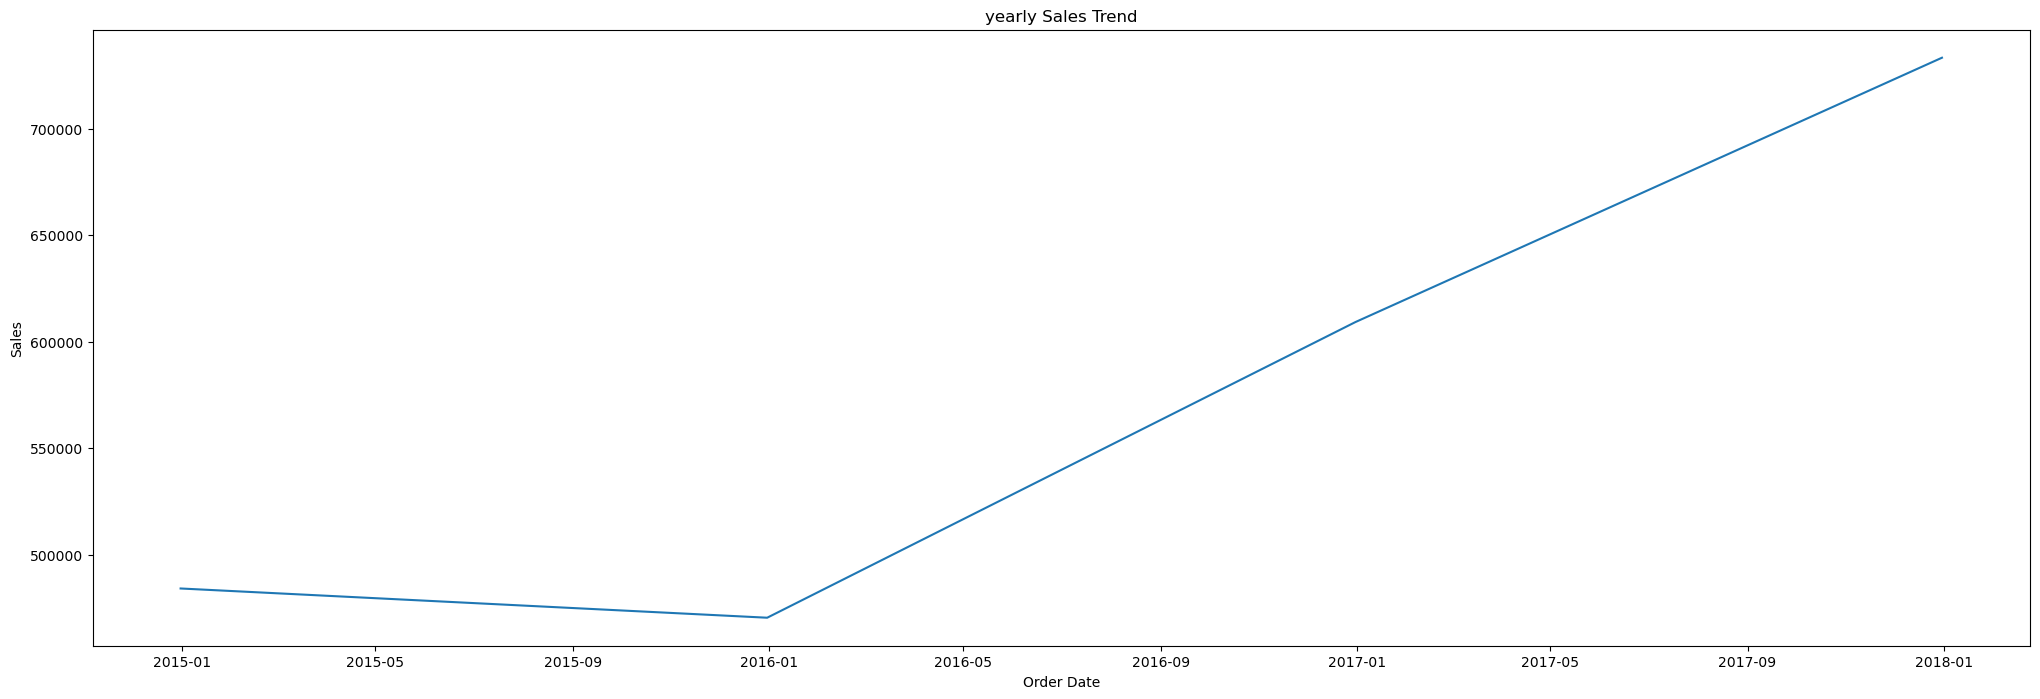

In [96]:
yearly_sales = monthly_sales.resample('YE').sum() 


plt.figure(figsize=(25,8))
plt.plot(yearly_sales['Sales'])
plt.xlabel("Order Date")
plt.ylabel("Sales")
plt.title("yearly Sales Trend")
plt.show()

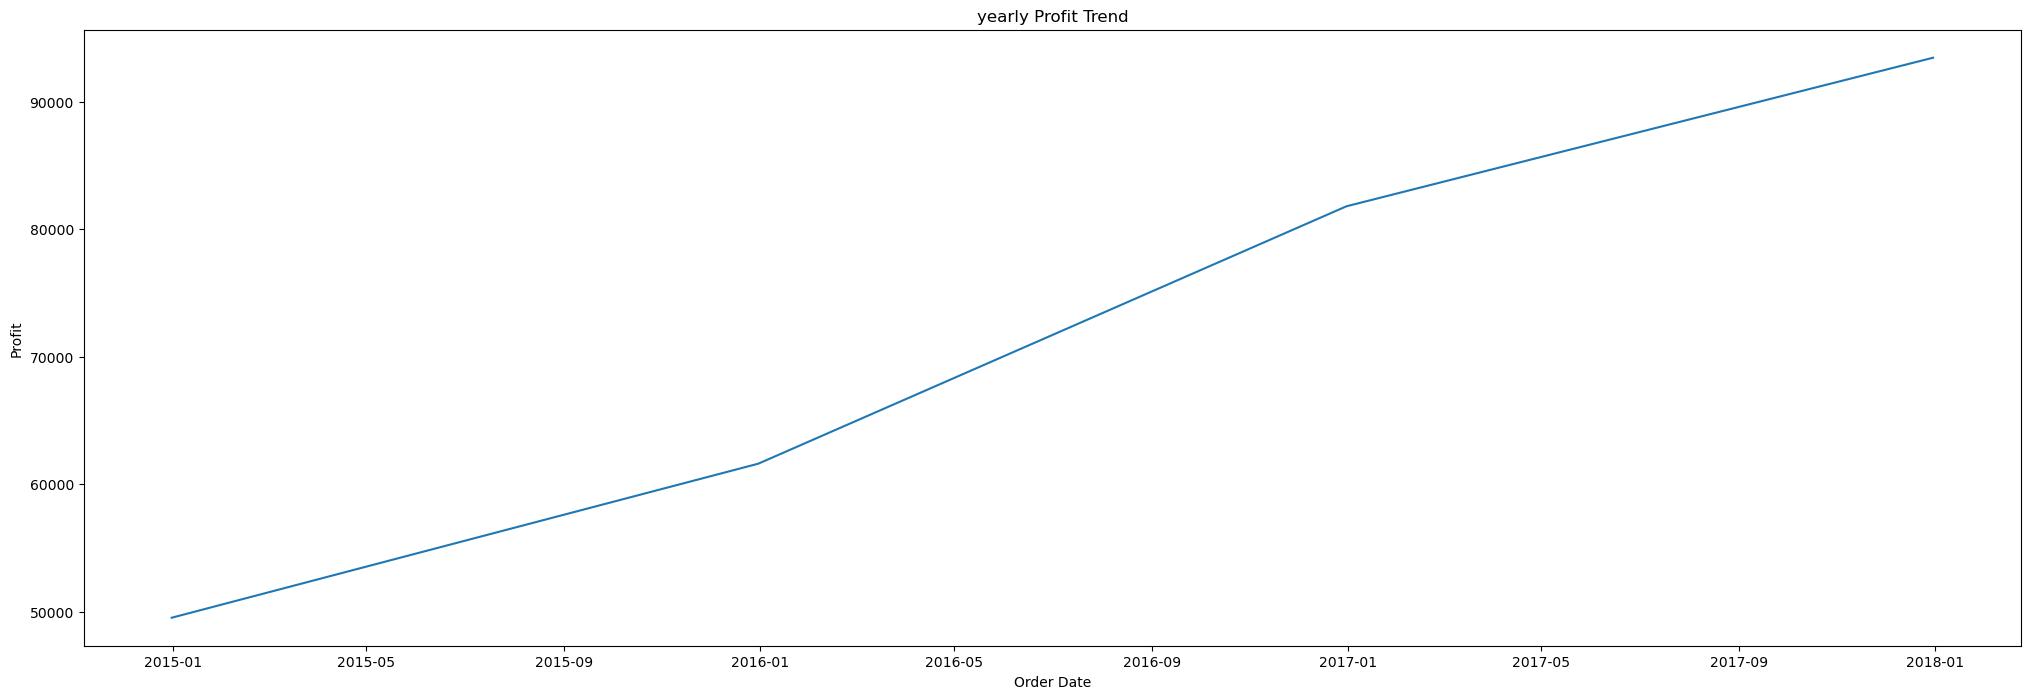

In [97]:
yearly_Profit = monthly_profit.resample('YE').sum() 


plt.figure(figsize=(25,8))
plt.plot(yearly_Profit['Profit'])
plt.xlabel("Order Date")
plt.ylabel("Profit")
plt.title("yearly Profit Trend")
plt.show()



The general trend of the company is profit, but there are some periods in which profits decrease and then rise again. I think it's because of the discounts


## Which region & place generates the most sales?

In [98]:
df_places = df[['Country','City','State','Region']]

In [99]:
df_places.head()

,Country,City,State,Region
0,United States,Henderson,Kentucky,South
1,United States,Henderson,Kentucky,South
2,United States,Los Angeles,California,West
3,United States,Fort Lauderdale,Florida,South
4,United States,Fort Lauderdale,Florida,South


In [100]:
for place in df_places.columns:
    print(place,':',df_places[place].nunique())

Country : 1
City : 531
State : 49
Region : 4


In [101]:
df_places = df[['City','State','Region','Sales','Profit']]

In [102]:
df_places.head()

,City,State,Region,Sales,Profit
0,Henderson,Kentucky,South,261.9600,41.9136
1,Henderson,Kentucky,South,731.9400,219.5820
2,Los Angeles,California,West,14.6200,6.8714
3,Fort Lauderdale,Florida,South,957.5775,-383.0310
4,Fort Lauderdale,Florida,South,22.3680,2.5164


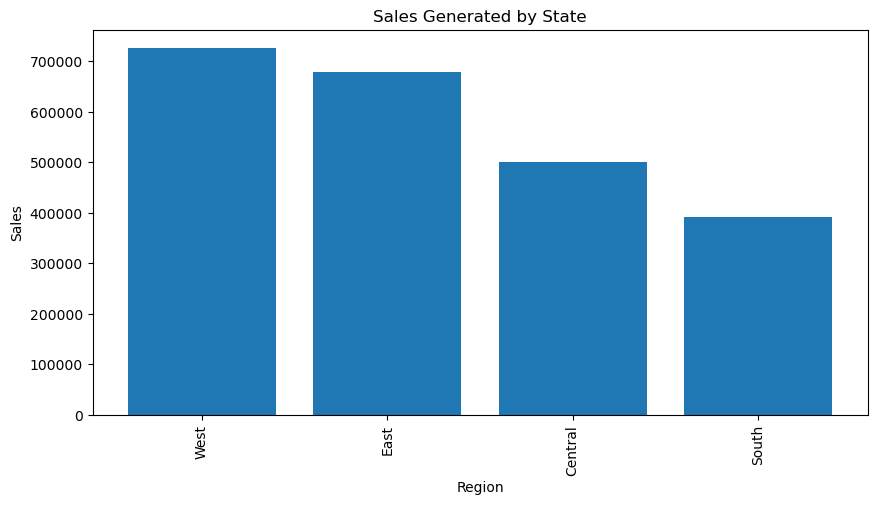

In [103]:
# Group the data by Region and City and calculate the total sales for each group
grouped_data = df_places.groupby(['Region'], as_index=False).sum()
grouped_data.sort_values(by='Sales', ascending=False, inplace=True)

# Plot the total sales geProfitnerated by each region and city
plt.figure(figsize=(10,5))
plt.bar(grouped_data['Region'], grouped_data['Sales'], align='center',)
plt.xlabel("Region")
plt.ylabel("Sales")
plt.title("Sales Generated by State")
plt.xticks(rotation=90)

plt.show()

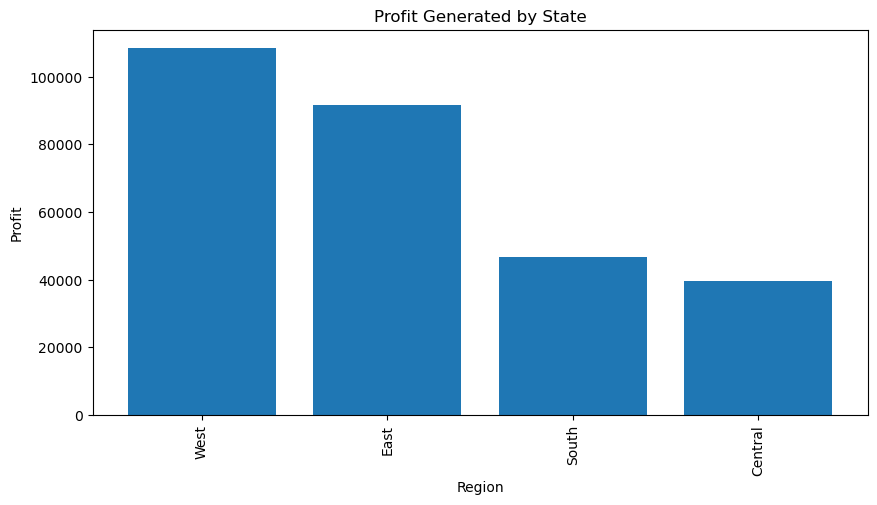

In [104]:
# Group the data by Region and City and calculate the total sales for each group
grouped_data = df_places.groupby(['Region'], as_index=False).sum()
grouped_data.sort_values(by='Profit', ascending=False, inplace=True)

# Plot the total sales generated by each region and city
plt.figure(figsize=(10,5))
plt.bar(grouped_data['Region'], grouped_data['Profit'], align='center',)
plt.xlabel("Region")
plt.ylabel("Profit")
plt.title("Profit Generated by State")
plt.xticks(rotation=90)

plt.show()

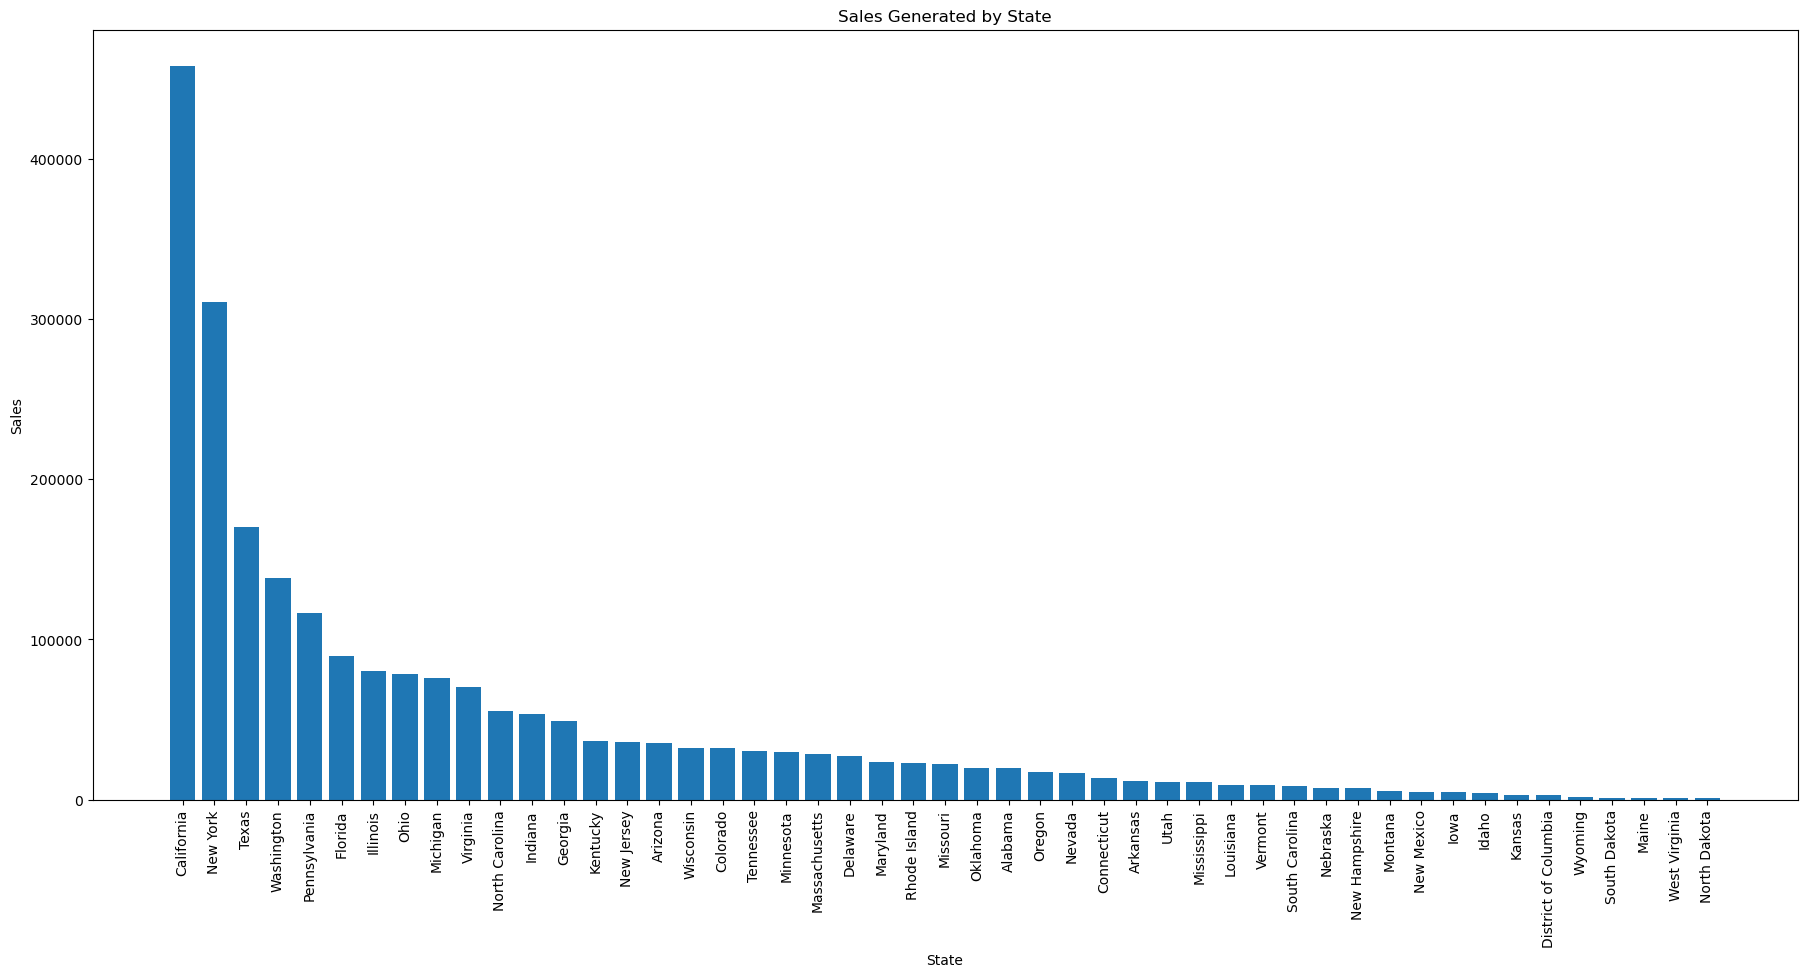

In [105]:
grouped_data = df_places.groupby(['State'], as_index=False).sum()
grouped_data.sort_values(by='Sales', ascending=False, inplace=True)


plt.figure(figsize=(22,10))
plt.bar(grouped_data['State'], grouped_data['Sales'], align='center',)
plt.xlabel("State")
plt.ylabel("Sales")
plt.title("Sales Generated by State")
plt.xticks(rotation=90)

plt.show()

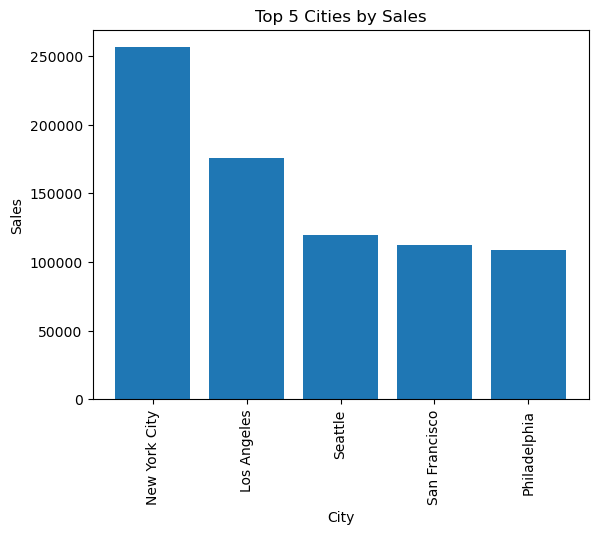

In [106]:
grouped_data_of_salles = df_places.groupby('City', as_index=False).sum()

# Sort the data by Sales in descending order
grouped_data_of_salles.sort_values(by='Sales', ascending=False, inplace=True)

# Select the top 5 cities
top_5_cities = grouped_data_of_salles.head()

plt.bar(top_5_cities['City'], top_5_cities['Sales'], align='center')
plt.xlabel("City")
plt.ylabel("Sales")
plt.title("Top 5 Cities by Sales")
plt.xticks(rotation=90)

plt.show()



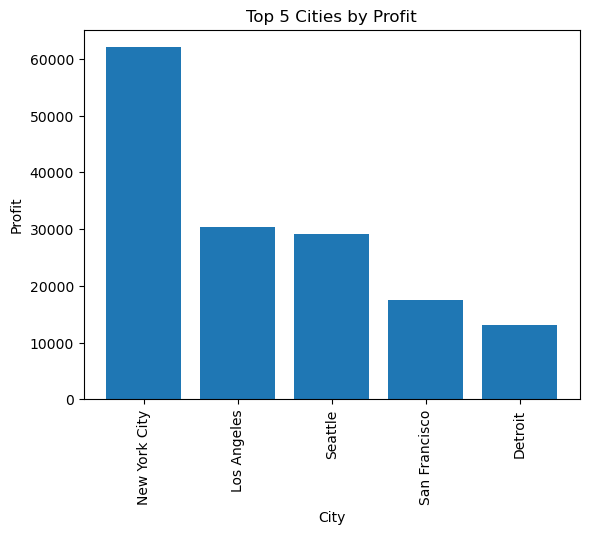

In [107]:
grouped_data_of_profit = df_places.groupby('City', as_index=False).sum()

# Sort the data by Sales in descending order
grouped_data_of_profit.sort_values(by='Profit', ascending=False, inplace=True)

# Select the top 5 cities
top_5_cities = grouped_data_of_profit.head()

plt.bar(top_5_cities['City'], top_5_cities['Profit'], align='center')
plt.xlabel("City")
plt.ylabel("Profit")
plt.title("Top 5 Cities by Profit")
plt.xticks(rotation=90)

plt.show()

In [108]:
top_5_cities.City

329    New York City
266      Los Angeles
452          Seattle
438    San Francisco
123          Detroit
Name: City, dtype: object


## top placies are :

Cities: [New York City, Los Angeles, Seattle, San Francisco, Detroit]

State : [california, New York]

Region : [West]


###  Impact of Discounts on Sales

In [109]:
df.Discount.value_counts()

Discount
0.00    4798
0.20    3657
0.70     418
0.80     300
0.30     227
0.40     206
0.60     138
0.10      94
0.50      66
0.15      52
0.32      27
0.45      11
Name: count, dtype: int64

###  Discount Distribution Insights

- Most orders (4798) were made **without any discount**.  
- Discounts of 20% are the most common among discounted orders (3657 orders).  
- Very high discounts (70%-80%) are rare, possibly used for promotions or inventory clearance.  
- Moderate discounts (10%-50%) can boost sales while maintaining profitability.  
- Extremely high discounts should be used carefully, as they may increase sales but reduce profit, sometimes resulting in negative profit.


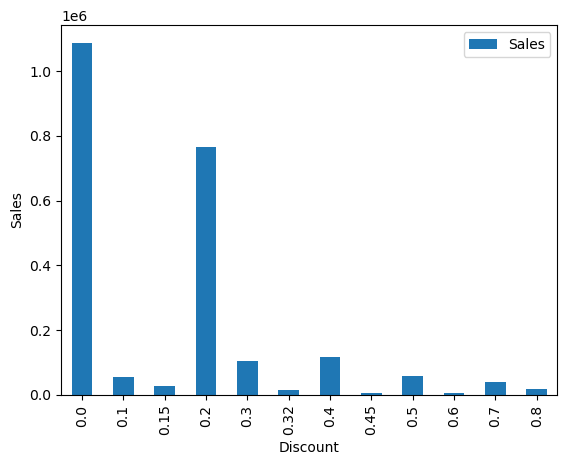

In [110]:
# Group the data by the discount and compute the average sales
discount_group = df.groupby("Discount")[["Sales"]].sum()

ax = discount_group.plot(kind="bar")

ax.set_ylabel("Sales")

plt.show()



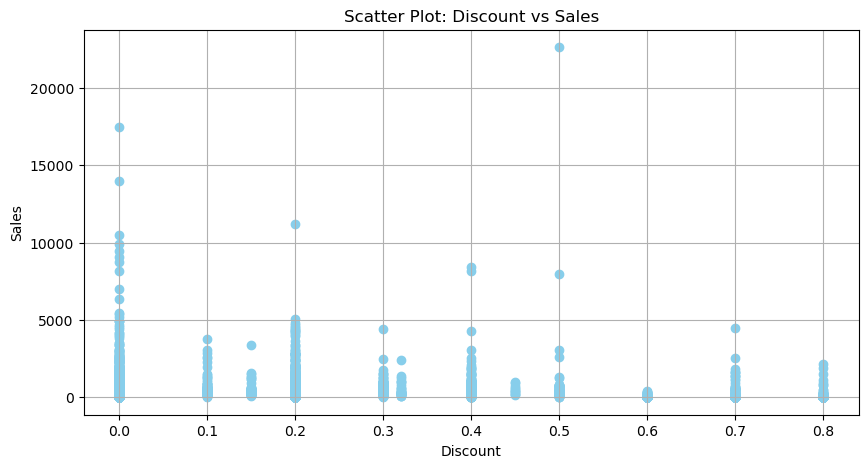

In [111]:
plt.figure(figsize=(10,5))
plt.scatter(df['Discount'], df['Sales'], alpha=1, color='skyblue')
plt.xlabel("Discount")
plt.ylabel("Sales")
plt.title("Scatter Plot: Discount vs Sales")
plt.grid(True)
plt.show()



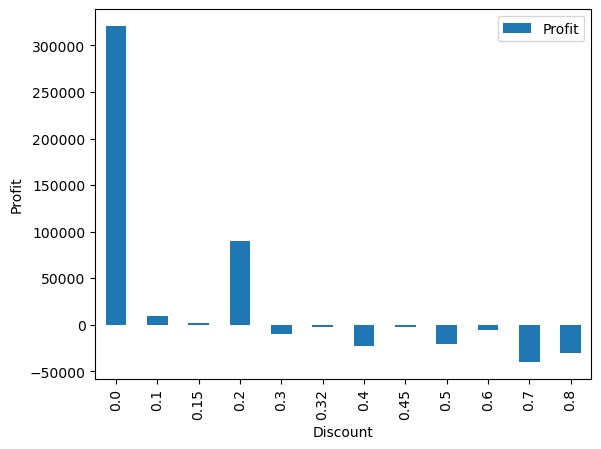

In [112]:
# Group the data by the discount and compute the average sales
discount_group = df.groupby("Discount")[["Profit"]].sum()
ax = discount_group.plot(kind="bar")

ax.set_ylabel("Profit")

plt.show()


## the best salles

The best sales are when the discount is 50% to 80%, but this leads to loss and non-profitability.

The discount from 10 to 20%. Is the best solution, as they are the second and third best sellers and make profits
`

In [113]:
# Calculate the ..th percentile of sales
sales_90th_percentile = df['Sales'].quantile(0.90)

# Filter the data to show only the values greater than ..% in sales
df_90 = df[df['Sales'] > sales_90th_percentile]

In [114]:
sales_90th_percentile 

572.7060000000001

In [115]:
df_90.shape

(1000, 21)

In [116]:
# Group the data by product category and calculate the average profit for each category
avg_profit_margin_by_category = df.groupby('Category')['Profit'].mean()

print(avg_profit_margin_by_category)

Category
Furniture           8.699327
Office Supplies    20.327050
Technology         78.752002
Name: Profit, dtype: float64


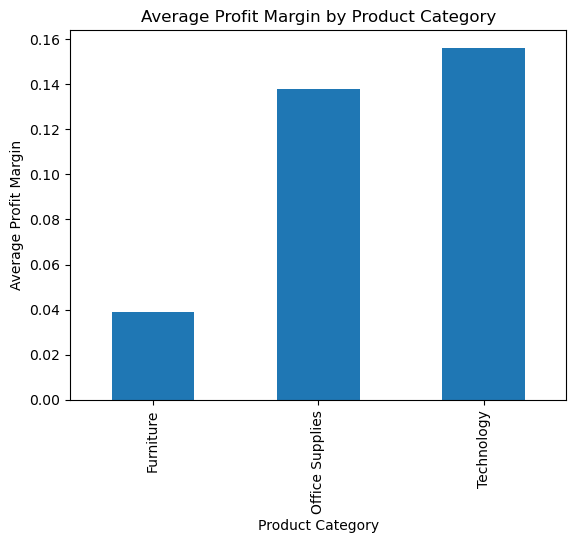

In [117]:
df['Profit Margin'] = df['Profit'] / df['Sales']

# Group the data by product category and calculate the average profit margin for each category
avg_profit_margin_by_category = df.groupby('Category')['Profit Margin'].mean()

# Plot the average profit margin for each category as a bar chart
avg_profit_margin_by_category.plot(kind='bar')

# Add a title and labels to the chart
plt.title("Average Profit Margin by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Average Profit Margin")

plt.show()



## Customers

In [118]:
df.Segment.value_counts()

Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64

In [119]:
df['Ship Mode'].value_counts()

Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64

In [120]:
pivot_table = df.pivot_table(index='Segment', columns='Ship Mode', values='Sales', aggfunc='sum')

In [121]:
pivot_table

Ship Mode,First Class,Same Day,Second Class,Standard Class
Segment,,,,
Consumer,159168.9650,60596.359,231498.9496,710137.0714
Corporate,105858.4699,45121.323,146126.0388,409040.5351
Home Office,86400.9880,22645.443,81568.5810,239038.1365


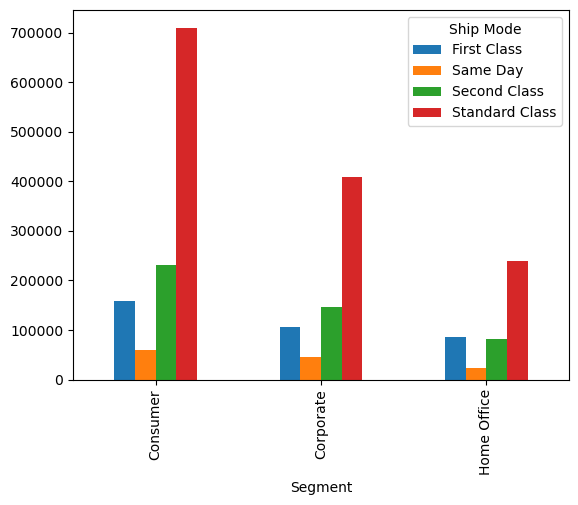

In [122]:
# Plot the pivot table as a bar chart
pivot_table.plot(kind='bar', stacked=False)

plt.show()

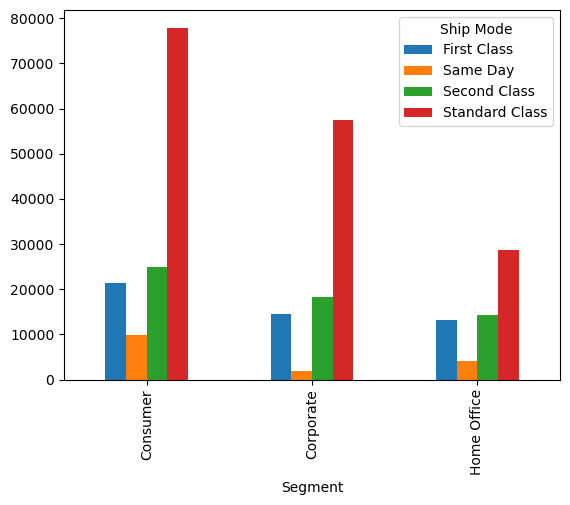

In [123]:
pivot_table = df.pivot_table(index='Segment', columns='Ship Mode', values='Profit', aggfunc='sum')

pivot_table.plot(kind='bar', stacked=False)

# Show the plot
plt.show()

## Most of the sales and profits come from (Consumers) who use (standard-class) shipping mode

## super sales overview from google chrome

![Alt Text]("C:\Users\Abdullah\Downloads\Superstore_Sales_Overview_2014-2017_3.jpg")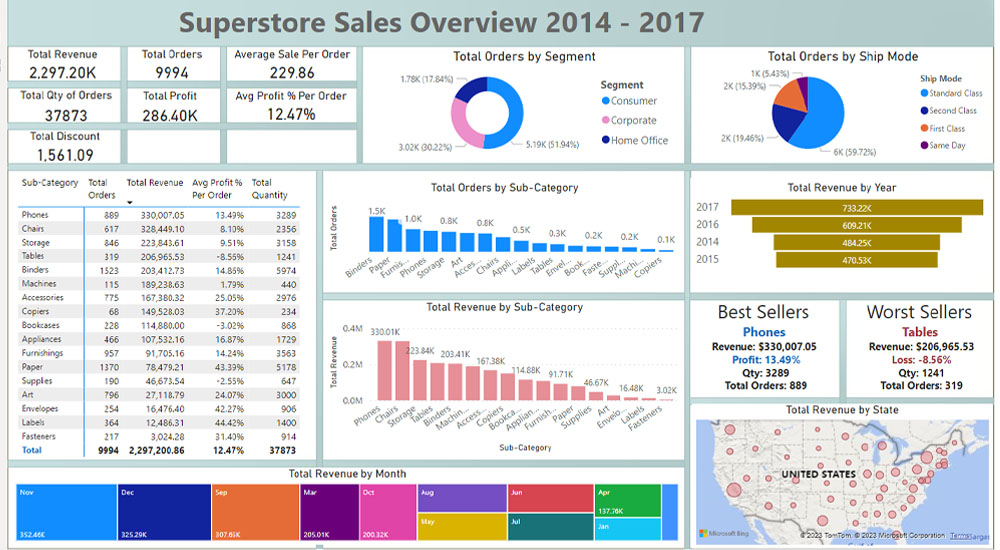